## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [9]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0)
]

In [10]:
from matplotlib.colors import ListedColormap
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

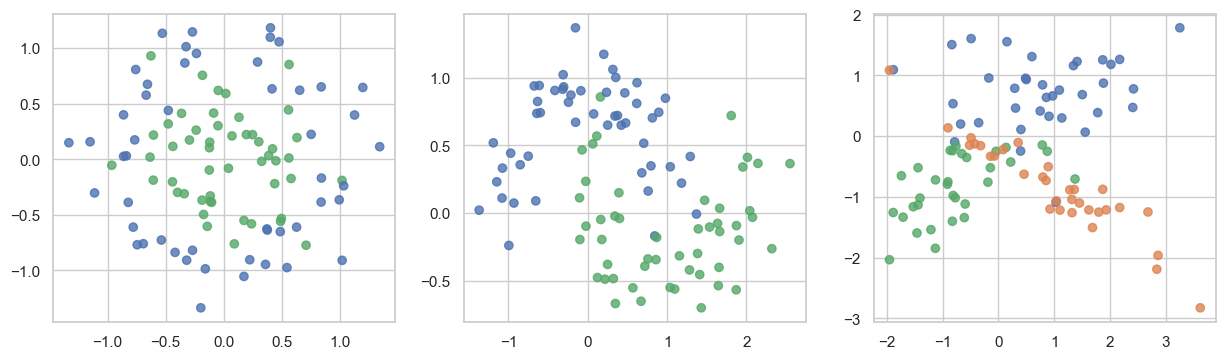

In [11]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [12]:
def plot_surface(plt, clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

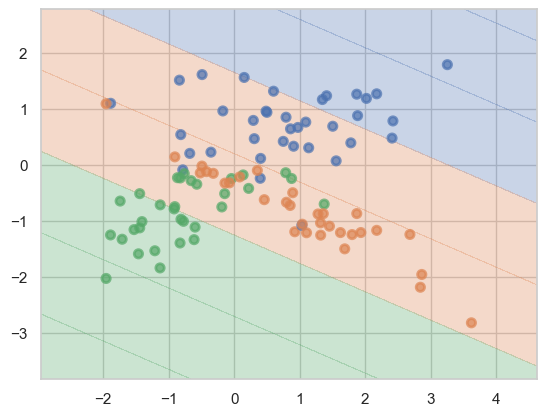

In [13]:
from sklearn.linear_model import LinearRegression
# Пример:
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(plt, lr, X, y)

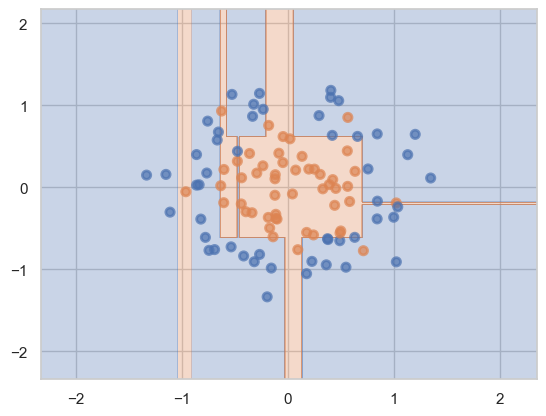

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#Для make_circles
X0, y0 = datasets[0]
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.3, random_state=33)
clf0 = DecisionTreeClassifier()
clf0 = clf0.fit(X0_train, y0_train)
plot_surface(plt, clf0, X0, y0)

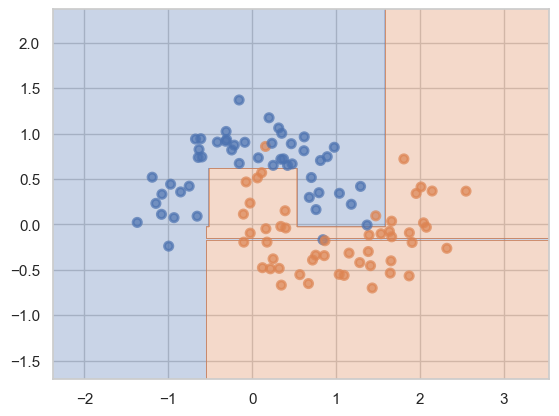

In [18]:
#Для make_moons
X1, y1 = datasets[1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=33)
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(X1_train, y1_train)
plot_surface(plt, clf1, X1, y1)

In [23]:
from sklearn.metrics import accuracy_score
def accuracy(clf, X, y):
    y_pred = clf.predict(X)
    accuracy = accuracy_score(y, y_pred)
    return accuracy

accuracy(clf0, X0_train, y0_train)

1.0

In [24]:
accuracy(clf0,X0_test, y0_test)

0.9333333333333333

In [25]:
accuracy(clf1, X1_train, y1_train)

1.0

In [26]:
accuracy(clf1, X1_test, y1_test)

0.9333333333333333

__Ответ:__ Высокая точность на тестовых данных, нет признака переобучения.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

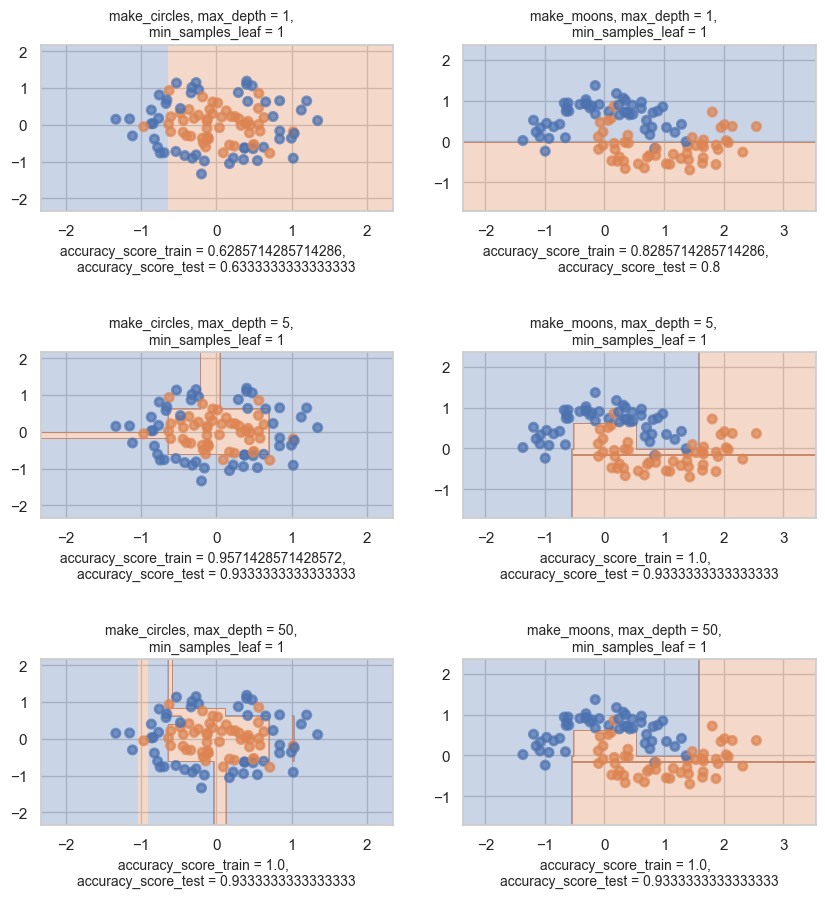

In [28]:
X = [[]]*2; y = [[]]*2
X[0], y[0] = X0, y0
X[1], y[1] = X1, y1
X = np.array(X); y = np.array(y)

X_train = [[]]*2; y_train = [[]]*2
X_train[0], y_train[0] = X0_train, y0_train
X_train[1], y_train[1] = X1_train, y1_train
X_train = np.array(X_train); y_train = np.array(y_train)

X_test = [[]]*2; y_test = [[]]*2
X_test[0], y_test[0] = X0_test, y0_test
X_test[1], y_test[1] = X1_test, y1_test
X_test = np.array(X_test); y_test = np.array(y_test)

titles = ["make_circles", "make_moons"]

max_depth = [1, 5, 50]

fig, ax = plt.subplots(3, 2, figsize=(10,10))
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,wspace=0.2,hspace=0.85)

for i in range(3):
    for j in range(2):
        clf = DecisionTreeClassifier(max_depth = max_depth[i], min_samples_leaf = 1)
        clf = clf.fit(X_train[j], y_train[j])
        plot_surface(ax[i][j], clf, X[j], y[j])
        ax[i][j].set_title(f'{titles[j]}, max_depth = {max_depth[i]},\
        \nmin_samples_leaf = 1',fontsize = 10)
        ax[i][j].set_xlabel(f' accuracy_score_train = {accuracy(clf, X_train[j], y_train[j])},\
        \naccuracy_score_test = {accuracy(clf, X_test[j], y_test[j])}', fontsize = 10) 

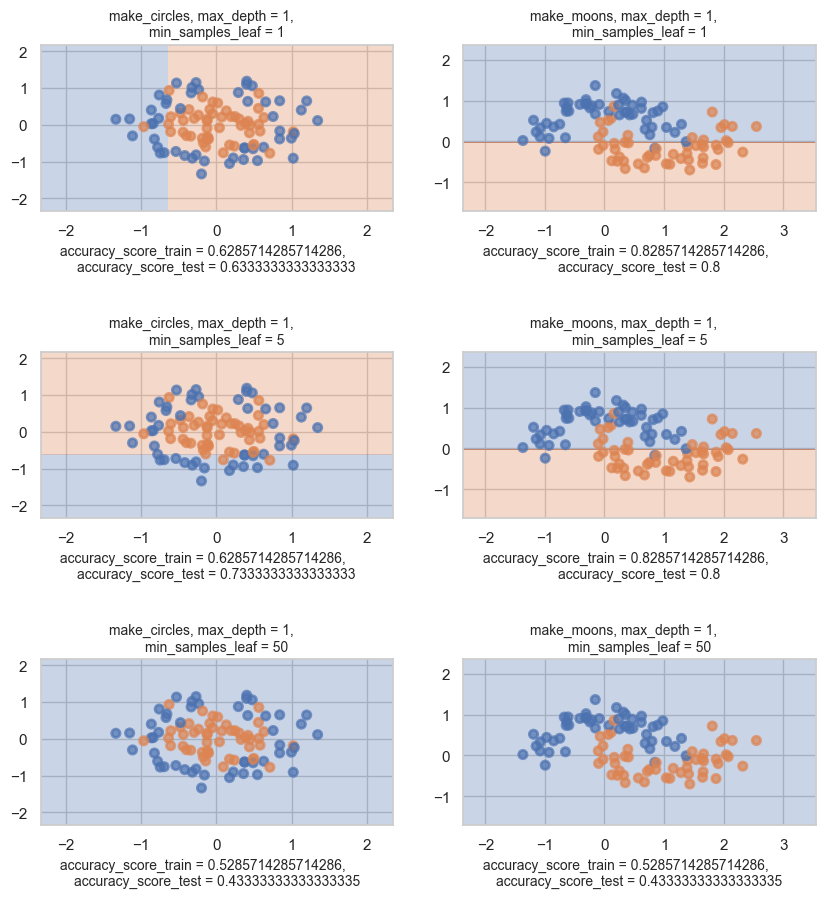

In [30]:
min_samples_leaf = [1, 5, 50]

fig, ax = plt.subplots(3, 2, figsize=(10,10))
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,wspace=0.2,hspace=0.85)

for i in range(3):
    for j in range(2):
        clf = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = min_samples_leaf[i])
        clf = clf.fit(X_train[j], y_train[j])
        plot_surface(ax[i][j], clf, X[j], y[j])
        ax[i][j].set_title(f'{titles[j]}, max_depth = 1,\
        \nmin_samples_leaf = {min_samples_leaf[i]}',fontsize = 10)
        ax[i][j].set_xlabel(f' accuracy_score_train = {accuracy(clf, X_train[j], y_train[j])},\
        \naccuracy_score_test = {accuracy(clf, X_test[j], y_test[j])}', fontsize = 10) 

__Ответ:__ Разделяющая поверхность - при увеличении max_depth разделяет лучше, а при увеличении min_samples_leaf разделяет хуже (это справедливо для обоих датасетов). Обобщающая способность - при увеличении max_depth становится лучше, а при увеличении min_samples_leaf становится хуже (это справедливо для обоих датасетов). Так происходит, потому что: max_depth - это максимальная глубина дерева, чем она больше, тем тщательнее строиться модель и показатели улучшаются, но работает дольше, min_samples_leaf - минимальное число объектов в листе, чем больше это значение, тем меньше классифицирующих правил будет учитываться и показатели ухудшаются, но работает быстрее. Изменения для разных датасетов почти одинаковое.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию _find best split_ из модуля hw5code.py

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [31]:
students = pd.read_csv('students.csv')

In [32]:
students.head(5)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [33]:
target = students['UNS']
features = students.drop(columns = 'UNS')

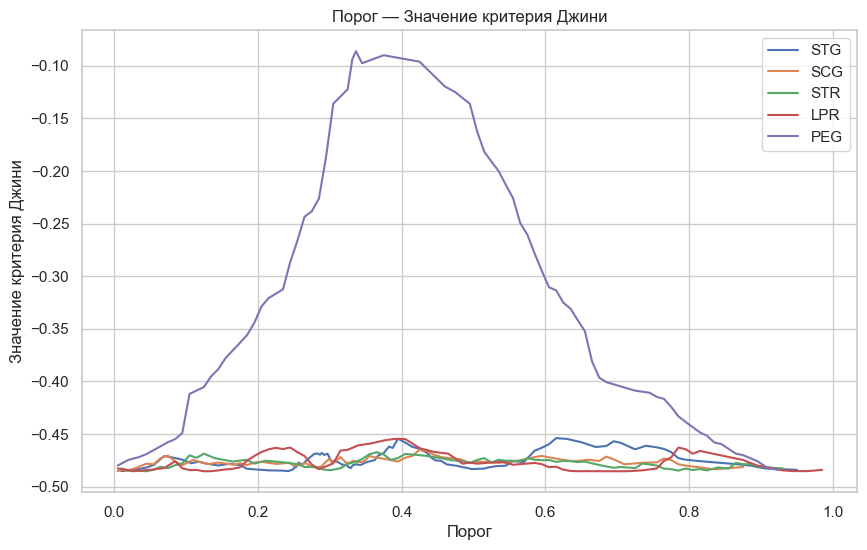

In [34]:
from hw5code import find_best_split
plt.figure(figsize=(10, 6))
plt.title('Порог — Значение критерия Джини')
plt.xlabel('Порог')
plt.ylabel('Значение критерия Джини')

for column_name in features.columns:
    thr, gini, thr_best, gini_best = find_best_split(features[column_name].values, target.values)
    plt.plot(thr, gini, label=column_name)
plt.legend()
plt.grid(True)

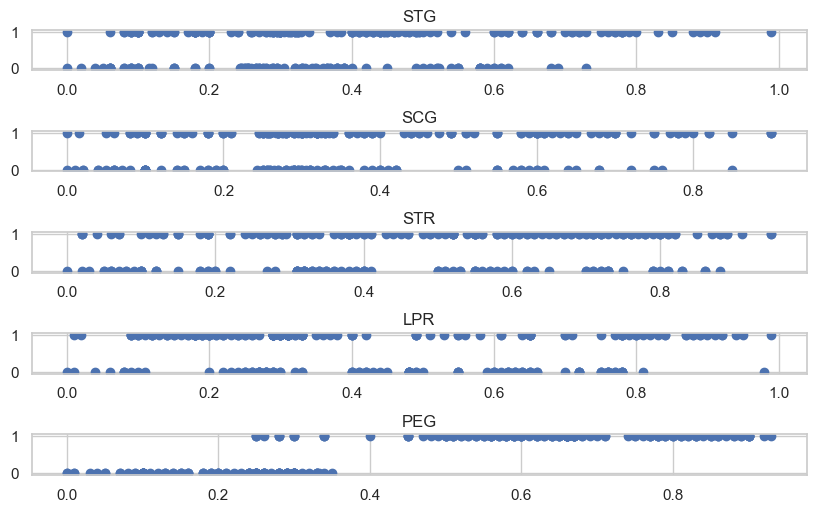

In [35]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, hspace=1.5)
for i, column_name in enumerate(features.columns):
    plt.subplot(5, 1, i + 1)
    plt.scatter(features[column_name].values, target.values)
    plt.title(column_name)

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** 1.Из представленных выше графиков видно, что деление лучше всего производить по признаку 'PEG';

2.Это согласуется с полученными scatter-графиками. Из графиков видно, граница на графике проходит приблизительно в точке 0.4. На графике индекса Джини мы получили точно такой же результат;

3.Кривая для "хороших" признаков имеет ярко выраженную точку максимума. Это помогает точнее разделить данные по признаку. Кривые признаков, по которым деление практически невозможно, находятся в окрестности одной точки.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода _fit node_. Напишите функцию _predict node_.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [36]:
from sklearn.preprocessing import LabelEncoder
def convert_to_labels(df):
    df = df.copy()
    for col_name in df.columns:
        le = LabelEncoder()
        df.loc[:, col_name] = le.fit_transform(df.loc[:, col_name]).astype(np.float32)
    return df

mushrooms = pd.read_csv('agaricus-lepiota.data', header=None)
mushrooms = convert_to_labels(mushrooms)

In [37]:
target = mushrooms.loc[:, 0]
features = mushrooms.drop(columns=[0])
X_train, X_test, y_train, y_test = train_test_split(np.array(features.values, dtype=np.int32),
                                                    np.array(target.values, dtype=np.int32),
                                                    test_size=0.5, random_state=67)

In [40]:
from hw5code import DecisionTree
feature_types = ['categorical' for x in range(X_train.shape[1])]
tr = DecisionTree(feature_types)
tr.fit(X_train, y_train)
accuracy(tr, X_test, y_test)

1.0

In [41]:
tr.depth

9

__8. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [42]:
tic_tac_toe = pd.read_csv('tic-tac-toe.data', header=None)
cars = pd.read_csv('car.data', header=None)
nursery = pd.read_csv('nursery.data', header=None)
mushrooms = pd.read_csv('agaricus-lepiota.data', header=None)

cars['target'] = np.where((cars.loc[:, 6] == 'unacc') | (cars.loc[:, 6] == 'acc'), 0, 1)
cars = cars.drop(columns=[6])

nursery['target'] = np.where((nursery.loc[:, 8] == 'not_recom') | (nursery.loc[:, 8] == 'recommend'), 0, 1)
nursery = nursery.drop(columns=[8])

mushrooms.rename(columns={0: 'target'}, inplace=True)
tic_tac_toe.rename(columns={9: 'target'}, inplace=True)

mushrooms = convert_to_labels(mushrooms)
tic_tac_toe = convert_to_labels(tic_tac_toe)
cars = convert_to_labels(cars)
nursery = convert_to_labels(nursery)

In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder

def train_decision_tree(X, y, feature_type):
    if (feature_type == 'real') | (feature_type == 'categorical'):
        feature_types = [feature_type] * X.shape[1]
        clf = DecisionTree(feature_types)
        clf.fit(X, y)
        return clf
    if feature_type == 'real + oh':
        feat_one_hot = OneHotEncoder(sparse=False).fit_transform(X)
        feature_types = ['real'] * feat_one_hot.shape[1]
        clf = DecisionTree(feature_types)
        clf.fit(X, y)
        return clf
    if feature_type == 'sklearn':
        clf = DecisionTreeClassifier()
        clf.fit(X, y)
        return clf
    
def train_decision_tree_cv(X, y, feature_type, cv=10):
    skf = StratifiedKFold(n_splits=cv)
    k = 0
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        clf = train_decision_tree(X[train_index], y[train_index], feature_type=feature_type)
        k += accuracy(clf, X[test_index], y[test_index])
    k = k / 10
    return k

In [52]:
data = {'mushrooms': mushrooms,'tictactoe': tic_tac_toe,'cars': cars,'nursery': nursery}
rows = ['mushrooms', 'tictactoe', 'cars', 'nursery']
columns = ['real', 'categorical', 'real + oh', 'sklearn']
df1 = pd.DataFrame(index=rows, columns=columns)
for name, df in data.items():
    a =[]
    X = df.drop(columns=['target']).values.astype(np.float32)
    y = df.loc[:, 'target'].values.astype(np.float32)
    for i in range(4):
        a.append(train_decision_tree_cv(X=X, y=y, feature_type=columns[i], cv=10))
    df1.loc[name] = a
print(df1)

               real categorical real + oh   sklearn
mushrooms  0.965556    0.982266  0.965556  0.961123
tictactoe  0.769572    0.820636  0.769572  0.798783
cars       0.947332    0.880431  0.947332  0.942707
nursery    0.999614    0.999846  0.999614  0.999691


__9. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Ранжируются одинаково, лучше всего работает случай категориальных данных, что логично, потому что у нас и были категориальные данные, методы real и real + oh считаются одинаково, sklearn считает хуже, чем real. Хуже всех считается датасет tictactoe можно предположить, что там что-то не так с данными.